# Machine Learning Analysis: Mobile Game In-App Purchases 📱🎮

## Introduction

In-game purchases have grown to be one of the largest sources of revenue in modern gaming industry. According to [Wikipedia](https://en.wikipedia.org/wiki/Microtransaction),

>"They discovered that free games represented 39% of the total revenue from January, and that the number jumped to 65% by June, helped in part by the fact that over 75% of the 100 top grossing apps are games."

Despite many games being free-to-play, players continue to spend their money on in-app purchases. Understanding how and why players spend money in games is not only relevant for maximizing revenue but also for designing fair and sustainable gaming ecosystems. Insights into spending behavior can inform targeted promotions, balanced gameplay design, and better user experiences.

This analysis explores player spending patterns on in-app purchases, with a focus on the mobile game market. In-app purchases are a major revenue driver for the entire gaming industry and understanding spending patterns is essential to improve monetization strategies.


***

## Objectives
- Understand the structure and contents of the dataset
- Clean and preprocess the data for analysis
- Perform exploratory data analysis to find spending trends
- Develop machine-learning models (Linear Regression and Random Forest) to predict in-app purchase amounts
- Evaluate model performance and accuracy

***

## Questions

Based on an initial study of the dataset, there are several questions we can ask to guide our analysis:
- What is the overall distribution of in-app purchases among players?
- How does spending vary across different countries?
- How does player age relate to average in-app spending?
- What is the age distribution of the player base?
- Which game genres are associated with higher spending?
- Do players on different devices (iOS, Android, etc.) spend differently?
- How does player engagement (number/length of sessions) correlate with spending?
- How are players distributed across spending segments (Minnows, Dolphins, Whales)?
- What is the total revenue from each spending segment?
- How has total revenue evolved over time?
- How well can we predict their in-app purchase amount?

## Importing Data

We import the required libraries and load the 2025 dataset from [Kaggle]("https://www.kaggle.com/datasets/pratyushpuri/mobile-game-in-app-purchases-dataset-2025").

- NumPy - Data arrays
- Pandas - Data manipulation
- Matplotlib - Data visualisation

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/pratyushpuri/mobile-game-in-app-purchases-dataset-2025")

Skipping, found downloaded files in "./mobile-game-in-app-purchases-dataset-2025" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV into pandas
df = pd.read_csv("/content/mobile-game-in-app-purchases-dataset-2025/mobile_game_inapp_purchases.csv")
df.head(10)

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05
5,992232c1-a563-4986-aa8b-b70d687d374f,38.0,Female,China,Android,Fighting,16,25.97,Dolphin,150.51,28.0,Google Pay,2025-05-05
6,702bafd0-9a08-4269-801e-faf32f9f3ca5,20.0,Female,Italy,Android,Simulation,9,10.98,Whale,608.21,24.0,Debit Card,2025-06-04
7,fc470ea9-111f-4637-a9ff-7162d81e2ec3,34.0,Female,Denmark,iOS,NaN,15,5.06,Minnow,19.17,30.0,Gift Card,2025-04-26
8,9b2efc1e-cd4b-48ab-b893-438d57855efa,38.0,Male,Japan,Android,Action RPG,10,21.82,Minnow,11.52,1.0,Paypal,2025-04-08
9,25723b60-ea5b-4aff-9f23-97fdf5e98c58,46.0,Male,Russia,iOS,Battle Royale,18,16.36,Minnow,7.76,19.0,Google Pay,2025-02-03


Column Descriptions from Kaggle

| Column Name              | Data Type | Description                               | Possible Values                                      | Business Significance                                     |
|--------------------------|-----------|-------------------------------------------|----------------------------------------------------|-----------------------------------------------------------|
| UserID                   | String    | Unique identifier for each user           | UUID format (e.g., c9889ab0-9cfc-4a75-acd9-5eab1df0015c) | Primary key for user tracking and analysis               |
| Age                      | Integer   | User's age in years                        | 13-54 years                                        | Demographic segmentation and age-based marketing         |
| Gender                   | String    | User's gender identity                     | Male, Female, Other                                | Gender-based behavior analysis and targeted campaigns    |
| Country                  | String    | User's country of origin                   | 10+ major gaming markets (USA, China, India, etc.) | Geographic revenue analysis and regional preferences     |
| Device                   | String    | Mobile platform used                        | iOS, Android                                       | Platform-specific monetization strategies                |
| GameGenre                | String    | Primary game genre played                  | MOBA, Battle Royale, Action RPG, Puzzle, etc.     | Genre-based spending pattern analysis                     |
| SessionCount             | Integer   | Number of gaming sessions                  | 1-22 sessions                                      | User engagement and retention metrics                     |
| AverageSessionLength     | Float     | Average session duration in minutes        | 5.0-35.0 minutes                                   | Player engagement depth and game stickiness               |
| SpendingSegment          | String    | Player spending classification             | Whale (2%), Dolphin (13%), Minnow (85%)           | Revenue segmentation for targeted monetization            |
| InAppPurchaseAmount      | Float     | Total purchase amount in USD               | $0.00-$5,000.00                                    | Direct revenue impact and spending behavior              |
| FirstPurchaseDaysAfterInstall | Integer | Days until first purchase                 | 0-30 days                                          | Conversion timeline and onboarding effectiveness         |
| PaymentMethod            | String    | Preferred payment gateway                  | Credit Card, Debit Card, PayPal, Google Pay, etc. | Payment preference optimization                            |
| LastPurchaseDate         | Date      | Most recent purchase timestamp             | 2025 dates                                         | Recency analysis and churn prediction                    |


##Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            2964 non-null   float64
 2   Gender                         2964 non-null   object 
 3   Country                        2964 non-null   object 
 4   Device                         2964 non-null   object 
 5   GameGenre                      2964 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            2888 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2888 non-null   float64
 11  PaymentMethod                  2888 non-null   object 
 12  LastPurchaseDate               2888 non-null   o

In [5]:
missing_values_count = df.isnull().sum()
total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100

# View missing value percentage
print("Missing Values: ", percent_missing, '%', sep='')

# View missing value count for each feature
print(df.isnull().sum())

Missing Values: 2.146927146927147%
UserID                             0
Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64


In [6]:
# Check for duplicates in dataset
df.duplicated().sum()

np.int64(0)

In [25]:
# Missing values were <2% so we replace them with 0
df = df.fillna(0)

# Drop 0 for ages and country
df = df[(df["Age"] != 0) & (df["Country"] != 0)]

# Replace 0 for devices and gamegenre
df.replace({"Device": {0: "Other"}, "GameGenre": {0: "Other"}}, inplace=True)

# Converting dates from strings to datetime objects so pandas can read
df["LastPurchaseDate"] = pd.to_datetime(df["LastPurchaseDate"], errors="coerce")

# Creating new features to help analysis
df['DaysSinceLastPurchase'] = (pd.Timestamp.today() - df['LastPurchaseDate']).dt.days
df['DaysSinceLastPurchase'] = df['DaysSinceLastPurchase'].fillna(0)

df['RevenuePerSession'] = df['InAppPurchaseAmount'] / df['SessionCount'].replace(0, np.nan)
df['RevenuePerSession'] = df['RevenuePerSession'].fillna(0)

# Checking again to confirm no missing values
print(df.isnull().sum())

UserID                           0
Age                              0
Gender                           0
Country                          0
Device                           0
GameGenre                        0
SessionCount                     0
AverageSessionLength             0
SpendingSegment                  0
InAppPurchaseAmount              0
FirstPurchaseDaysAfterInstall    0
PaymentMethod                    0
LastPurchaseDate                 0
DaysSinceLastPurchase            0
RevenuePerSession                0
dtype: int64


In [8]:
# Descriptive statistics
df.describe()

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,LastPurchaseDate,DaysSinceLastPurchase,RevenuePerSession
count,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2776,2905.000000,2905.000000
mean,33.495353,10.062995,20.073256,100.593494,14.741136,2025-04-24 15:28:00.691642624,116.922203,10.714961
min,13.000000,1.000000,5.010000,0.000000,0.000000,2025-01-01 00:00:00,0.000000,0.000000
25%,23.000000,8.000000,12.680000,5.140000,7.000000,2025-02-28 00:00:00,58.000000,0.500000
50%,33.000000,10.000000,20.360000,11.470000,15.000000,2025-04-26 00:00:00,116.000000,1.128571
75%,44.000000,12.000000,27.420000,17.580000,23.000000,2025-06-20 00:00:00,175.000000,1.979000
max,54.000000,22.000000,34.990000,4964.450000,30.000000,2025-08-13 00:00:00,236.000000,875.662000
std,12.019214,3.126327,8.584850,452.947210,9.292302,NaN,68.175501,49.689204


## Data Analysis and Visualization

### Distribution of In-App Purchases

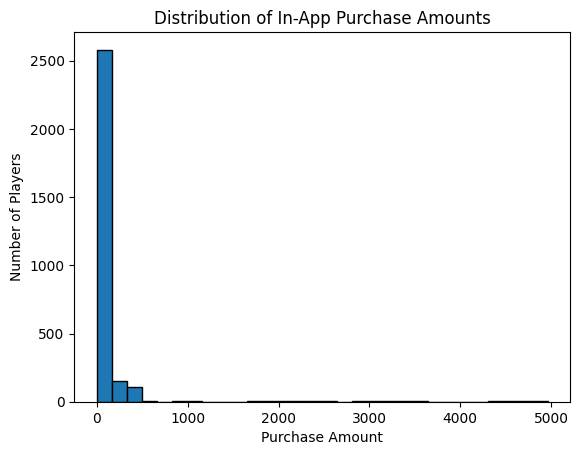

In [86]:
df["InAppPurchaseAmount"].plot.hist(bins=30, edgecolor="black")
plt.title("Distribution of In-App Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.ylabel("Number of Players")
plt.show()

### Average Revenue by Country

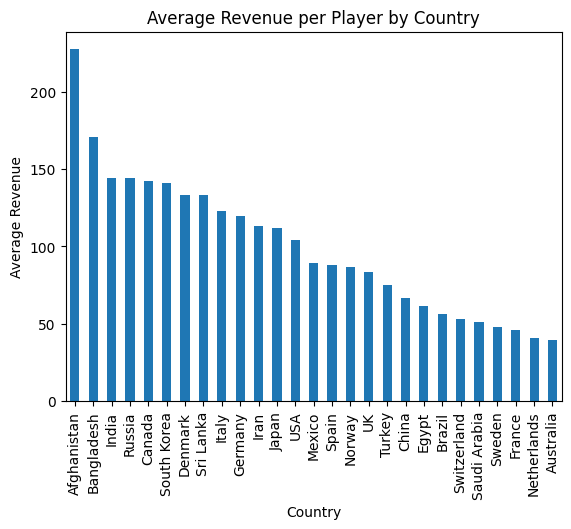

In [75]:
avg_revenue_by_country = df.groupby("Country")["InAppPurchaseAmount"].mean().sort_values(ascending=False)
avg_revenue_by_country.plot.bar()
plt.title("Average Revenue per Player by Country")
plt.ylabel("Average Revenue")
plt.xlabel("Country")
plt.show()

### Average Revenue by Age

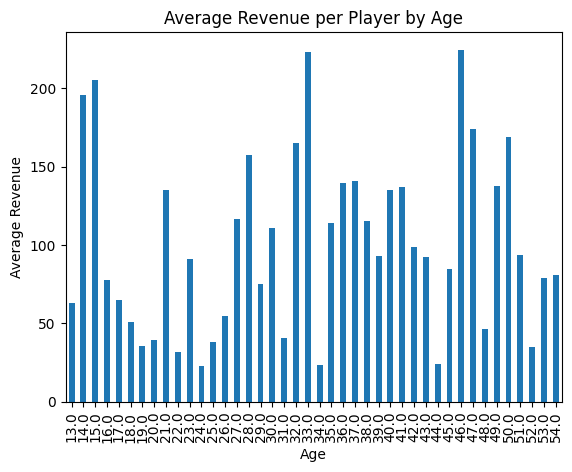

In [74]:
avg_revenue_by_age = df.groupby("Age")["InAppPurchaseAmount"].mean().sort_index()
avg_revenue_by_age.plot.bar()
plt.title("Average Revenue per Player by Age")
plt.xlabel("Age")
plt.ylabel("Average Revenue")
plt.show()

### Age Distribution

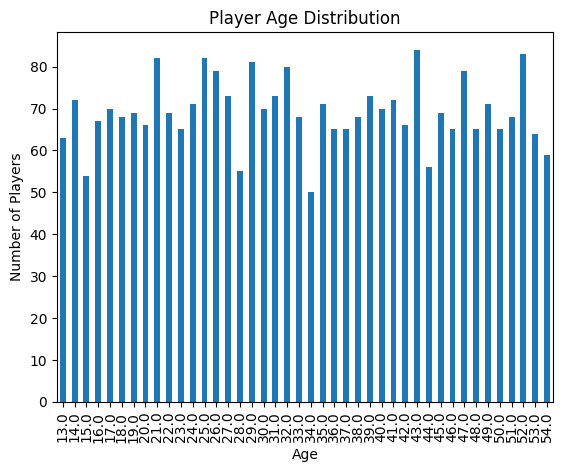

In [71]:
age_distribution = df["Age"].value_counts().sort_index()
age_distribution.plot.bar()
plt.title("Player Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.show()

### Average Revenue by Genre

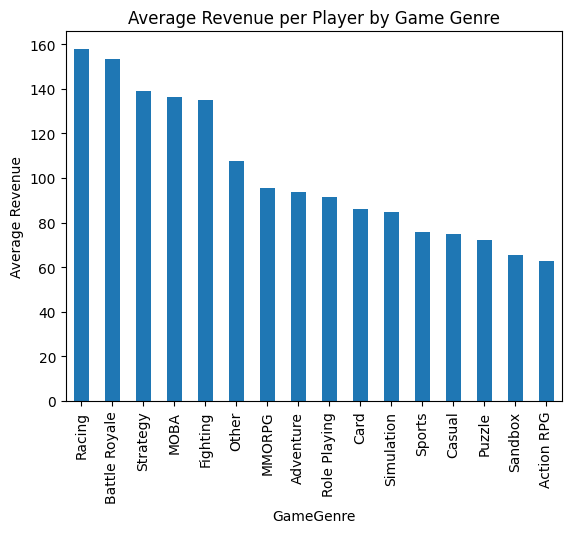

In [96]:
avg_revenue_by_genre = df.groupby("GameGenre")["InAppPurchaseAmount"].mean().sort_values(ascending=False)
avg_revenue_by_genre.plot.bar()
plt.title("Average Revenue per Player by Game Genre")
plt.ylabel("Average Revenue")
plt.show()

### Average Revenue by Device

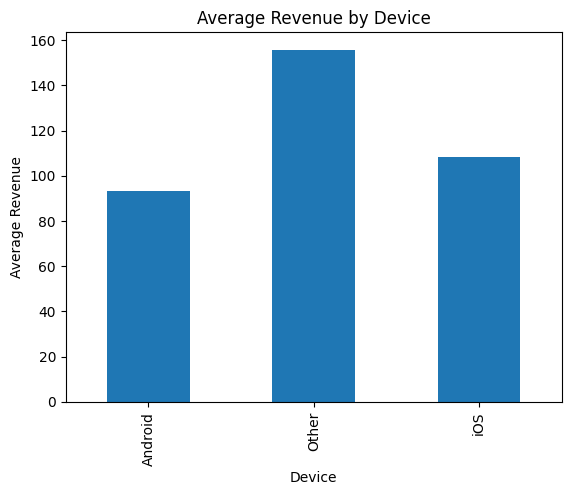

In [97]:
avg_revenue_by_device = df.groupby("Device")["InAppPurchaseAmount"].mean()
avg_revenue_by_device.plot.bar()
plt.title("Average Revenue by Device")
plt.ylabel("Average Revenue")
plt.show()

### Session Count Revenue

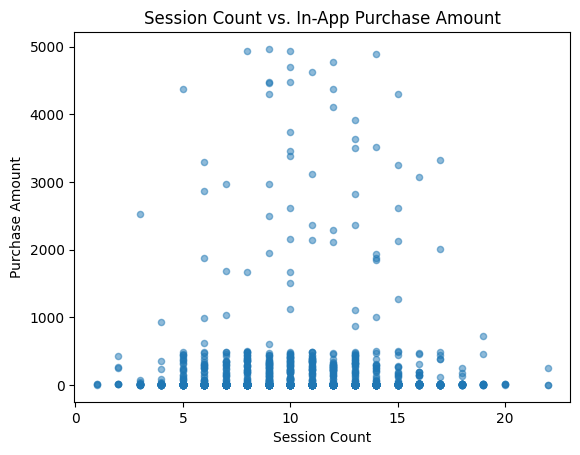

In [66]:
df.plot.scatter(x="SessionCount", y="InAppPurchaseAmount", alpha=0.5)
plt.title("Session Count vs. In-App Purchase Amount")
plt.xlabel("Session Count")
plt.ylabel("Purchase Amount")
plt.show()

### Session Length Revenue

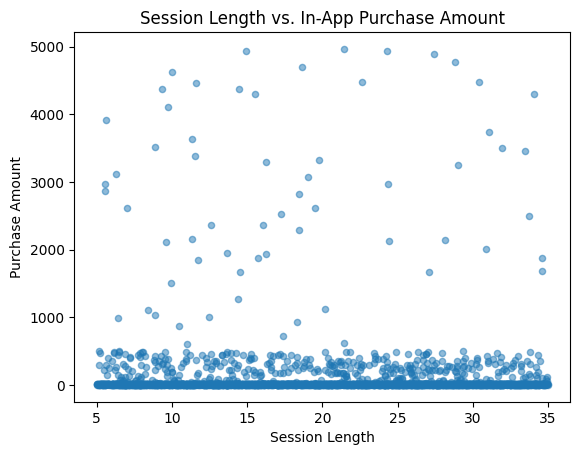

In [67]:
df.plot.scatter(x="AverageSessionLength", y="InAppPurchaseAmount", alpha=0.5)
plt.title("Session Length vs. In-App Purchase Amount")
plt.xlabel("Session Length")
plt.ylabel("Purchase Amount")
plt.show()

### Spending Segment Distribution

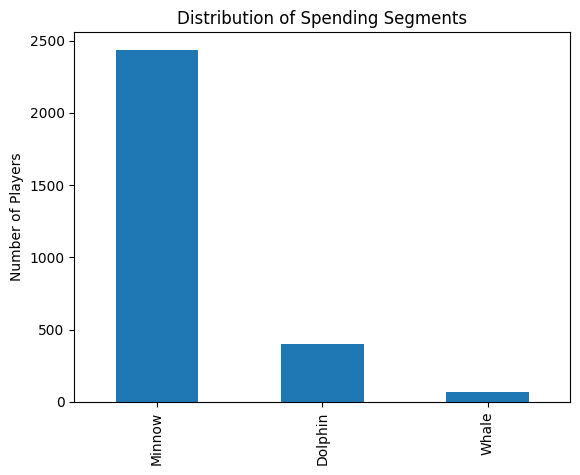

In [92]:
segment_counts = df["SpendingSegment"].value_counts()
segment_counts.plot.bar()
plt.title("Distribution of Spending Segments")
plt.xlabel("")
plt.ylabel("Number of Players")
plt.show()

### Spending Segment Total Revenue

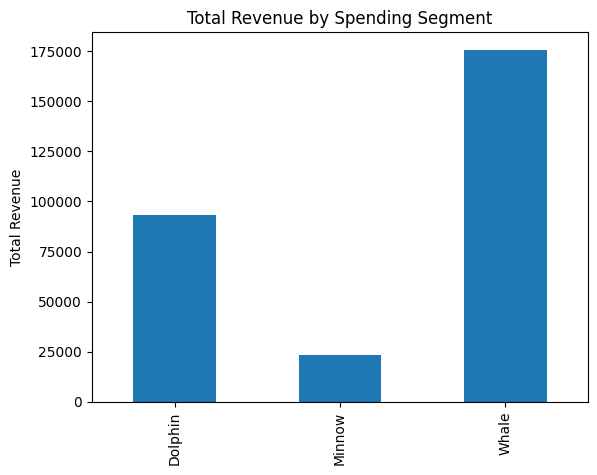

In [93]:
total_revenue_by_segment = df.groupby("SpendingSegment")["InAppPurchaseAmount"].sum()
total_revenue_by_segment.plot.bar()
plt.title("Total Revenue by Spending Segment")
plt.xlabel("")
plt.ylabel("Total Revenue")
plt.show()

### Revenue Over Time

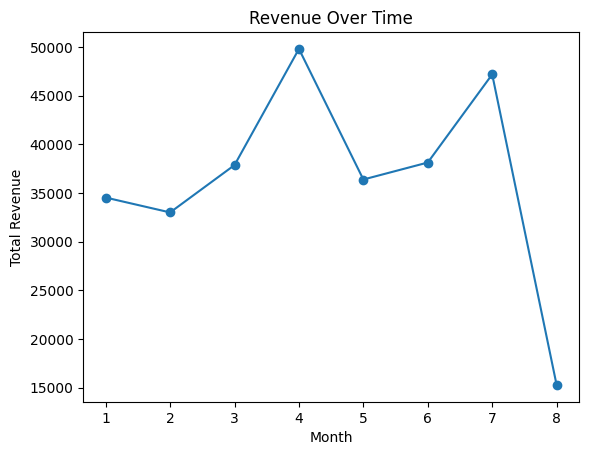

In [89]:
monthly_revenue = df.groupby(df["LastPurchaseDate"].dt.month)["InAppPurchaseAmount"].sum()
monthly_revenue.plot.line(marker="o")
plt.title("Revenue Over Time")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.show()

## **Model Building**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seperate features
y = df["InAppPurchaseAmount"]
X = df[["Age", "SessionCount", "AverageSessionLength", "DaysSinceLastPurchase", "RevenuePerSession"]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
X_train, X_test, y_train, y_test

(       Age  SessionCount  AverageSessionLength  DaysSinceLastPurchase  \
 413   30.0             7                 22.71                   84.0   
 845   48.0             5                 30.09                  164.0   
 2745  14.0            11                 27.34                  190.0   
 2383  20.0            10                  7.77                  216.0   
 3020  48.0             9                 19.45                   31.0   
 ...    ...           ...                   ...                    ...   
 2872  31.0            12                 25.21                   63.0   
 936   26.0             8                 29.46                  208.0   
 1133  23.0            15                 31.36                   49.0   
 244   46.0            11                 14.23                  185.0   
 1098  27.0             7                  6.93                  130.0   
 
       RevenuePerSession  
 413           42.192857  
 845            2.720000  
 2745           0.267273  
 2

In [20]:
print(X_train.isnull().sum())

Age                      0
SessionCount             0
AverageSessionLength     0
DaysSinceLastPurchase    0
RevenuePerSession        0
dtype: int64


### Linear Regression

In [21]:
# Fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)

lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# Evaluations
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)


LR MSE (Train):  20456.402138906316
LR R2 (Train):  0.904595701399625
LR MSE (Test):  55773.145120439636
LR R2 (Test):  0.6675737949568704


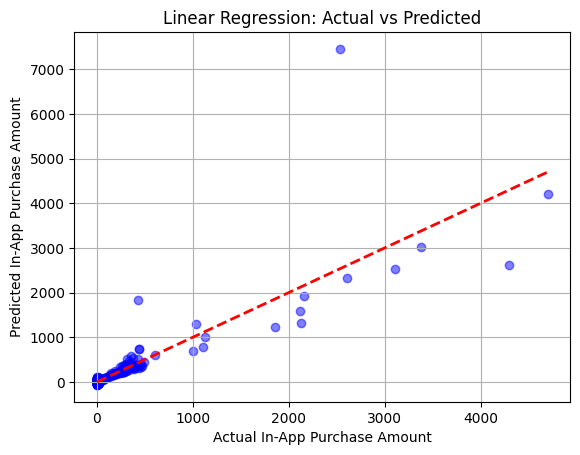

In [22]:
# Scatter plot for Linear Regression
plt.scatter(y_test, y_lr_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual In-App Purchase Amount")
plt.ylabel("Predicted In-App Purchase Amount")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)

### Random Forest

In [23]:
# Fit the Random Forest model
rf = RandomForestRegressor(n_estimators=200, random_state=1)
rf.fit(X_train, y_train)

# Make predictions
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred  = rf.predict(X_test)

rf_train_rmse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_rmse  = mean_squared_error(y_test, y_rf_test_pred)

rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_r2  = r2_score(y_test, y_rf_test_pred)

# Evaluations
print("RMSE (Train):", rf_train_rmse)
print("R² (Train):", rf_train_r2)
print("RMSE (Test):", rf_test_rmse)
print("R² (Test):", rf_test_r2)



RMSE (Train): 995.5780675344549
R² (Train): 0.9953568361342294
RMSE (Test): 9234.543177368154
R² (Test): 0.9449590992738475


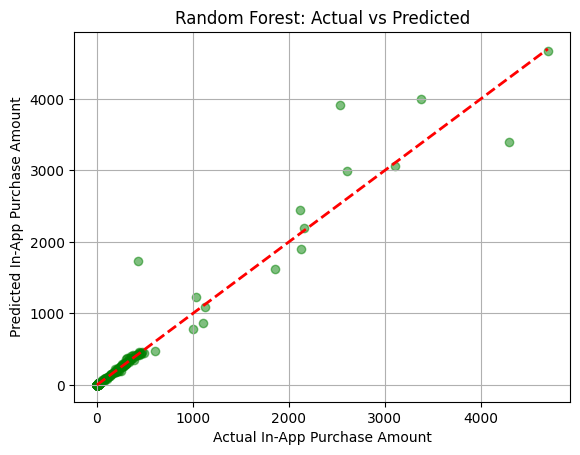

In [24]:
# Scatter plot for Random Forest
plt.scatter(y_test, y_rf_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual In-App Purchase Amount")
plt.ylabel("Predicted In-App Purchase Amount")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)

# Conclusion

***

As a beginner to programming, I used this project to learn Python, data cleaning, visualization, and predictive modeling, gaining hands-on experience in programming and machine learning.

The project successfully cleaned, explored, visualized, and modeled mobile game in-app purchase data.

Machine Learning models were used to predict player spending, with Random Forest outperforming Linear Regression in RMSE and R².

Visualizations revealed patterns in spending across various factors, helping identify high-value spenders and revenue drivers.

Key findings:
- Most players spend little to none on in-game app purchases, few high spending players are responsible for majority of revenue
- Player spending varies the most by country, genre, and device
- Player age distribution is fairly distributed with no large spikes
- Session count and session length correlate with higher spending
- Random Forest provided better predictive accuracy than Linear Regression

Next steps:
- Explore player spending datasets from earlier years to compare trends over time
- Test additional machine learning models